# **Padding, Strides, and Pooling**


Some of the major ideas we will try to understand through this notebook:

*   The **working of a convolutional layer**
*   The **impact of filters on the output shape**
*   The **use of padding** to overcome the problem of under-utilizing pixels at the edge and the shrinking effect of convolutions
*   The **use of strides**
*   The **use of pooling** as a robust method for eliminating unwanted features






* In Convolutional Neural Networks (CNNs), we require modified convolution layers to apply additional operations like padding, strides and pooling on an input.
* The input may be a 2D or 3D image, but typically it is a 3D image with rows, columns and channels as input. So the filters should also be in three dimensions, as they need to have an equal number of channels, even though they may have a smaller number of rows and columns.
* These filters essentially operate over the input, and generate output feature maps, which are arrays or matrices as well.


## **Introduction** 

For the purpose of this exercise, we will use a simple input image sample. 

This 8x8 square image has only one channel, with a 2 pixel-wide vertical line of 1 over the center and with all the other values being 0. 

This input can be depicted as a matrix shown in the image below <br><br>
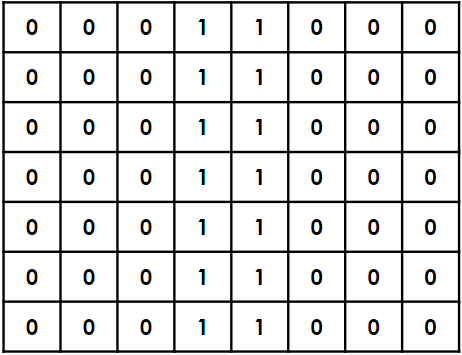


In [ ]:
# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

# This 2D input data can be created using the numpy array and then reshaped into 8x8x1 
from numpy import asarray
# Defining input data as a 2d list
df = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]

# Converting the 2D list into a numpy array
df = asarray(df)

# Reshaping the input array into 8x8x1
df = df.reshape(1, 8, 8, 1)  # (samples,rows,columns,depth/channels)


**Note**: Here we have used the **reshape (1,8,8,1)** function with the 4 values being - **(samples, rows, columns, depth/channels)** 

*   Samples denote the **number of images**
*   Rows denote the **number of rows**
*   Columns denote the **number of columns**
*   Depth denotes the **number of channels**



**We would also use a filter of size 3x3**. The filter would contain the weights that will be learned during the training process. These filters tell us about the features that it would detect in the input.<br>

Keras provides a simple way of implementing a convolution layer, called **Conv2D**.<br>

The Conv2D function is required to have the following parameters specified:

*   **The input shape** of the input image
*   **The number of filters**
*   **The input shape of the filter**


Here, we shall use 1 filter with a 3x3 filter-size and an input-size of (8,8,1) 

The link to the documentation of **[Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)** can be looked over to learn about all the parameters in the function.

In [ ]:
# Here we will be using the sequential model and creating a convolutional layer using Conv2D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# Creating the sequential model with one convolutional layer
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(8, 8, 1)))
# Model summary
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 6, 6, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


**The Conv2D method** is given with 4 inputs as shown in the above code where **1** represents the number of filters, **(3,3)** represents the shape of the filter and **input_shape=(8,8,1)** shows us the input shape that is given to this first convolution layer. <br>

Currently the filter is intialized with random weights by default, but we will hard code our 3x3 filter weights for the time being to detect the vertical edges from our input.<br>

**These filter weights would get strongly activated when they come across a vertical edge in the input**, otherwise they would be weakly activated. By "activated", we mean that **the output values for that region would be very high** in comparison, due to the nature of the sum of element-wise products for similar elements from the input and the filter. 

We are trying to use this filter over the input image to check if a vertical edge gets detected.


In [ ]:
import pandas as pd
# Defining a 3x3 vertical line detector 
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
pd.DataFrame(detector).shape

(3, 3)

The 3x3 vertical detector defined would be converted into a Numpy array and a bias value would be added to it. 

We then use the **set_weights()** function to set the weights to the model as shown below.

In [ ]:
# Defining the weights using the detector and adding a bias value to it
weights = [asarray(detector), asarray([0.0])]
# Storing the weights in the model
model.set_weights(weights)

Applying the filter over the input image using the **predict()** function

In [ ]:
# Using the filter on our input
y_hat = model.predict(df)
y_hat.shape

(1, 6, 6, 1)

We can observe that we have received a 4-dimensional output after using the predict function. This has four values **(batch/number of samples,rows,columns,number of filters)**.

**Note**: There should be no confusion between the input shape to the first convolution layer and the output shape of the first convolution layer.<br>


*   The input shape to the first convolution layer should be **(batch/number of samples, rows,columns,depth/channels)**
*   The output shape to the first convolution layer should be **(batch/number of samples, rows,columns,number of filters in the convolution layer)**




In [ ]:
y_hat.shape

(1, 6, 6, 1)

In [ ]:
for r in range(y_hat.shape[1]):     # Here y_hat.shape[1] will give us the row value as 6 in this example
	# Printing each column in the row
  feature_map=[y_hat[0,r,c,0] for c in range(y_hat.shape[2])]  # Here y_hat.shape[1] will give us the column value as 6 in this example
  print(feature_map)
  # Here y_hat[0,r,c,0] signifies the first sample represented as 0 and the all the rows and columns as r and c and the filter which is indexed at 0 here.

[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


* We can observe that **we are extracting the output feature map**, and that **the vertical edges** from the middle of the input **are detected** using this filter.
*   We can also observe that we have provided an input image of 8x8, but **we have received an output of 6x6.** This shows that we got the output reduced from 64 pixels to 36 pixels when we used a filter of 3x3. so we have lost 28 pixels here. This effect of reduction of the size of input, is called the **Border Effect** of convolutions.
*  This is not much of a problem when we have images of a larger size and filters of comparatively much smaller sizes, but it will become a problem with smaller images, as we may lose an important amount of information from the input data.
*  This **Border Effect** also increases with an increase in the number of convolution layers stacked one after another. 
<br> For example, if we were to add one more convolution layer with a filter of 3x3 after this example, then the 8x8 input image would eventually reduce to 4x4.  







In [ ]:
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(8, 8, 1)))
model.add(Conv2D(1, (3,3)))
# Model summary
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 6, 6, 1)           10        
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 1)           10        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


*  The Border Effect can hence not just be left unchecked. We need a control, that determines whether we want to allow the Border Effect or not, and if not, we want to obtain an output with the same size as that of the input. <br><br> 
This can be done by adding a variation to convolution, called **Padding**.

## **Padding**




*   **In Padding, we add pixels to the border of the input image by "padding" it with zeros**.
*   In TensorFlow and Keras, padding is implemented using a **padding** argument in the Conv2D layer. 
* There are two values which can be used with padding - **valid** which means there is no padding and **same** which adds padding as required to the input image and ensures that the output has the same shape as that of the input.

In [ ]:
# Padding can be implemented as shown below
# Creating a sequential model with padding ='same'
model = Sequential()
model.add(Conv2D(1, (3,3), padding='same', input_shape=(8, 8, 1)))
# Model summary
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 8, 8, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


*   We observe that with **'same' padding**, the output shape of the image is same as input with shape=8x8
*   Thus **Same Padding helps in keepiing the output shape the same as the input.** This is true for any number of Conv2D layers that we add with padding = 'same', **the shape always remains the same**, as shown below.



In [ ]:
# Creating a sequential model with 4 layers and padding='same'
model = Sequential()
model.add(Conv2D(1, (3,3), padding='same', input_shape=(8, 8, 1)))
model.add(Conv2D(1, (3,3), padding='same'))
model.add(Conv2D(1, (3,3), padding='same'))
model.add(Conv2D(1, (3,3), padding='same'))
# Model summary
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 8, 8, 1)           10        
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 1)           10        
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 1)           10        
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 1)           10        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


As observed, the output shape remains the same as the input shape.

## **Strides**

*   Strides are used for reducing the dimensionality of the input, and making the convolution operation invariant to minor changes like roation and shifting. It modifies the convolution over the input, to now using a filter **with a particular shift value, known as the stride.**
*   In TensorFlow and Keras, Stride is implemented using a **stride** arguement in the Conv2D layer. **It should be specified as a tuple, with a width and height value.** 
* Here, we will be using a stride of (2,2).


In [ ]:
# Creating a sequential model with a filter of 3x3 and using stride (2,2) over an 8x8 input image
model = Sequential()
model.add(Conv2D(1, (3,3), strides=(2, 2), input_shape=(8, 8, 1)))
# Model summary
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 3, 3, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


As we observe, the output shape has now decreased. 

Now, we will also use this model on the same input data of 8x8 pixels and the same vertical detector/filter of 3x3.

In [ ]:
y_hat = model.predict(df)

for r in range(y_hat.shape[1]):     # Here y_hat.shape[1] will give us the row value as 6 in this example
	# Printing each column in the row
  feature_map=[y_hat[0,r,c,0] for c in range(y_hat.shape[2])]  # Here y_hat.shape[1] will give us the column value as 6 in this example
  print(feature_map)
  # Here y_hat[0,r,c,0] signifies the first sample represented as 0 and the all the rows and columns as r and c and the filter which is indexed at 0 here.

[0.0, -0.72713476, 0.40972036]
[0.0, -0.72713476, 0.40972036]
[0.0, -0.72713476, 0.40972036]


In [ ]:
# Example of vertical line filter with a stride of 2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from numpy import asarray

# This 2d input data can be created using the numpy array and then reshaped into 8x8x1 
# Defining input data as a 2d list
df = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
# Converting the 2d list into numpy array
df = asarray(df)
# Reshaping the one input array into 8x8x1
df = df.reshape(1, 8, 8, 1)  # (samples,rows,columns,depth/channels)

# Creating a sequential model with a filter of 3x3 and using stride (2,2) over an input image of 8x8 pixel values
model = Sequential()
model.add(Conv2D(1, (3,3), strides=(2, 2), input_shape=(8, 8, 1)))
# model summary
model.summary()

# Defining a 3x3 vertical line detector 
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
# Defining the weights using the detector and adding a bias value to it
weights = [asarray(detector), asarray([0.0])]
# Stroing the weights in the model
model.set_weights(weights)

# Using the filter on our input
y_hat = model.predict(df)

for r in range(y_hat.shape[1]):     # Here y_hat.shape[1] will give us the row value as 6 in this example
	# Printing each column in the row
  feature_map=[y_hat[0,r,c,0] for c in range(y_hat.shape[2])]  # Here y_hat.shape[1] will give us the column value as 6 in this example
  print(feature_map)
  # Here y_hat[0,r,c,0] signifies the first sample represented as 0 and the all the rows and columns as r and c and the filter which is indexed at 0 here.


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 3, 3, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


We observe that the input has been downsampled and the input dimension has been reduced. 

However we can still detect the vertical line in the input and represent this vertical edge with less information.

## **Pooling**

### **The ReLU Activation Function before Pooling**

We have already looked into an example showing convolution filters, padding and strides. 

Before going over the idea of pooling, we will look into an example where the **ReLU** activation function is applied.

*  The **ReLU or Rectified Linear Unit** activation function, is first applied over each value of the obtained output feature map (after the convolution, padding and stride operations), since it will contain negative values on account of the negative values present in the filter.
* This is an effective way to **add non-linearity to the model** without changing the values of the feature map.
*  **Adding such non-linearity using ReLU is considered a best practice** in Computer Vision research, **before adding pooling to our model.**





In [ ]:
# Example showing the use of Activation function ReLU in our model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from numpy import asarray

# This 2d input data can be created using the numpy array and then reshaped into 8x8x1 
# Defining input data as a 2d list
df = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
# Converting the 2d list into numpy array
df = asarray(df)
# Reshaping the one input array into 8x8x1
df = df.reshape(1, 8, 8, 1)  # (samples,rows,columns,depth/channels)

# Creating a sequential model with a filter of 3x3 with relu activation over an input image of 8x8 pixel values
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
# model summary
model.summary()

# Defining a 3x3 vertical line detector 
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
# Defining the weights using the detector and adding a bias value to it
weights = [asarray(detector), asarray([0.0])]
# Stroing the weights in the model
model.set_weights(weights)

# Using the filter on our input
y_hat = model.predict(df)

for r in range(y_hat.shape[1]):     # Here y_hat.shape[1] will give us the row value as 6 in this example
	# Printing each column in the row
  feature_map=[y_hat[0,r,c,0] for c in range(y_hat.shape[2])]  # Here y_hat.shape[1] will give us the column value as 6 in this example
  print(feature_map)
  # Here y_hat[0,r,c,0] signifies the first sample represented as 0 and the all the rows and columns as r and c and the filter which is indexed at 0 here.


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 6, 6, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


We observe that the vertical edge has been detected.

### **Average Pooling**

*   **Average Pooling** is applied over a pool size / patch size of 2x2, and **to obtain the average value** of the values in that given patch size.
*   Thus the 2x2 size feature map gets downsampled to its regional average values.
*   Average Pooling can be implemented in Keras using the **AveragePooling2D** layer. This is imported from **tensorflow.keras.layers**.
*   The default pool size is (2,2), and the stride vaue in this case means using the pool size as the stride value (2,2).



In [ ]:
# Example showing the use of Activation function Relu and AveragePooling2D() layer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D
from numpy import asarray

# This 2d input data can be created using the numpy array and then reshaped into 8x8x1 
# Defining input data as a 2d list
df = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
# Converting the 2d list into numpy array
df = asarray(df)
# Reshaping the one input array into 8x8x1
df = df.reshape(1, 8, 8, 1)  # (samples,rows,columns,depth/channels)

# Creating a sequential model with a filter of 3x3 with relu activation over an input image of 8x8 pixel values and adding a pooling layer
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(AveragePooling2D())
# model summary
model.summary()

# Defining a 3x3 vertical line detector 
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
# Defining the weights using the detector and adding a bias value to it
weights = [asarray(detector), asarray([0.0])]
# Stroing the weights in the model
model.set_weights(weights)

# Using the filter on our input
y_hat = model.predict(df)

for r in range(y_hat.shape[1]):     # Here y_hat.shape[1] will give us the row value as 6 in this example
	# Printing each column in the row
  feature_map=[y_hat[0,r,c,0] for c in range(y_hat.shape[2])]  # Here y_hat.shape[1] will give us the column value as 6 in this example
  print(feature_map)
  # Here y_hat[0,r,c,0] signifies the first sample represented as 0 and the all the rows and columns as r and c and the filter which is indexed at 0 here.


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 6, 6, 1)           10        
                                                                 
 average_pooling2d_1 (Averag  (None, 3, 3, 1)          0         
 ePooling2D)                                                     
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


We observe that the vertical edge has been detected even after downsampling the feature map.

### **Max Pooling**

*   **Max Pooling** is similar to Average Pooling, but **it uses the maximum value over the patch size** rather than the average value.
*   It is implemented in Keras using the **MaxPooling2D** layer. This also needs to be imported from **tensorflow.keras.layers**.

In [ ]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D
# Create a model with one convolutional layer and max pooling layer
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D())
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 6, 6, 1)           10        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 1)          0         
 2D)                                                             
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


We observe that the feature maps have been decreased to half after adding the max_pooling layer over the convolution layer.

# **Happy Learning!**